# Data Science Assessment

In [ ]:
# Using Python 3.11.3
# Uncomment below for easy env setup
#!pip install numpy pandas seaborn matplotlib scikit-learn

In [191]:
#numerical
import numpy as np
import pandas as pd

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

#modeling
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

#extra
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [153]:
clinical_data = pd.read_csv("clinical.csv", index_col=0)

def print_dataset_info(clinical_data: pd.DataFrame) -> None:
    display(clinical_data.head())

    print(f"Dataset contains information from {len(clinical_data.index.unique())} patients with {len(clinical_data.columns)} features\n\n")

    for var in clinical_data.columns:
        if clinical_data[var].dtype == "float64":
            var_range = [clinical_data[var].min(), clinical_data[var].max()]
        else:
            var_range = clinical_data[var].unique()

        print(f"Feature {var} is of type: {clinical_data[var].dtype} and contains values in: {var_range}")

    print(f"\n\nFeatures that contain missing values: {clinical_data.columns[clinical_data.isna().any()].to_list()}")


print_dataset_info(clinical_data)

,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations
ID,,,,,,,,,,,,,,,
1,Alive,9.0,67,4,0,UNK,2.0,NaN,0,IV,Left Lower Lobe,Squamous cell carcinoma,1.4,8,8
2,Dead,19.0,73,2,0,UNK,2.0,0.0,5,IV,Right Upper Lobe,Adenocarcinoma,NaN,2,2
3,Dead,13.0,72,3,0,2,2.0,0.0,0,IIIA,Right Upper Lobe,Adenocarcinoma,1.5,1,1
4,Dead,15.0,69,9,1,1a,0.0,1.0,0,IA,Right Upper Lobe,Adenocarcinoma,NaN,4,4
5,Dead,10.0,76,9,0,UNK,NaN,NaN,0,IIIA,Left Hilar,Large-cell carcinoma,NaN,3,3


Dataset contains information from 190 patients with 15 features


Feature Outcome is of type: object and contains values in: ['Alive' 'Dead']
Feature Survival.Months is of type: float64 and contains values in: [9.0, 71.0]
Feature Age is of type: int64 and contains values in: [67 73 72 69 76 62 83 71 70 74 63 82 56 77 84 68 80 78 60 59]
Feature Grade is of type: int64 and contains values in: [4 2 3 9]
Feature Num.Primaries is of type: int64 and contains values in: [0 1]
Feature T is of type: object and contains values in: ['UNK' '2' '1a' '3' '4' '2a' '1b' '2b' '1']
Feature N is of type: float64 and contains values in: [0.0, 3.0]
Feature M is of type: float64 and contains values in: [0.0, 1.0]
Feature Radiation is of type: int64 and contains values in: [0 5]
Feature Stage is of type: object and contains values in: ['IV' 'IIIA' 'IA' 'IVB' 'IIA' 'IIIB' 'IIB' 'IB' '1B']
Feature Primary.Site is of type: object and contains values in: ['Left Lower Lobe' 'Right Upper Lobe' 'Left Hilar' 'Right 

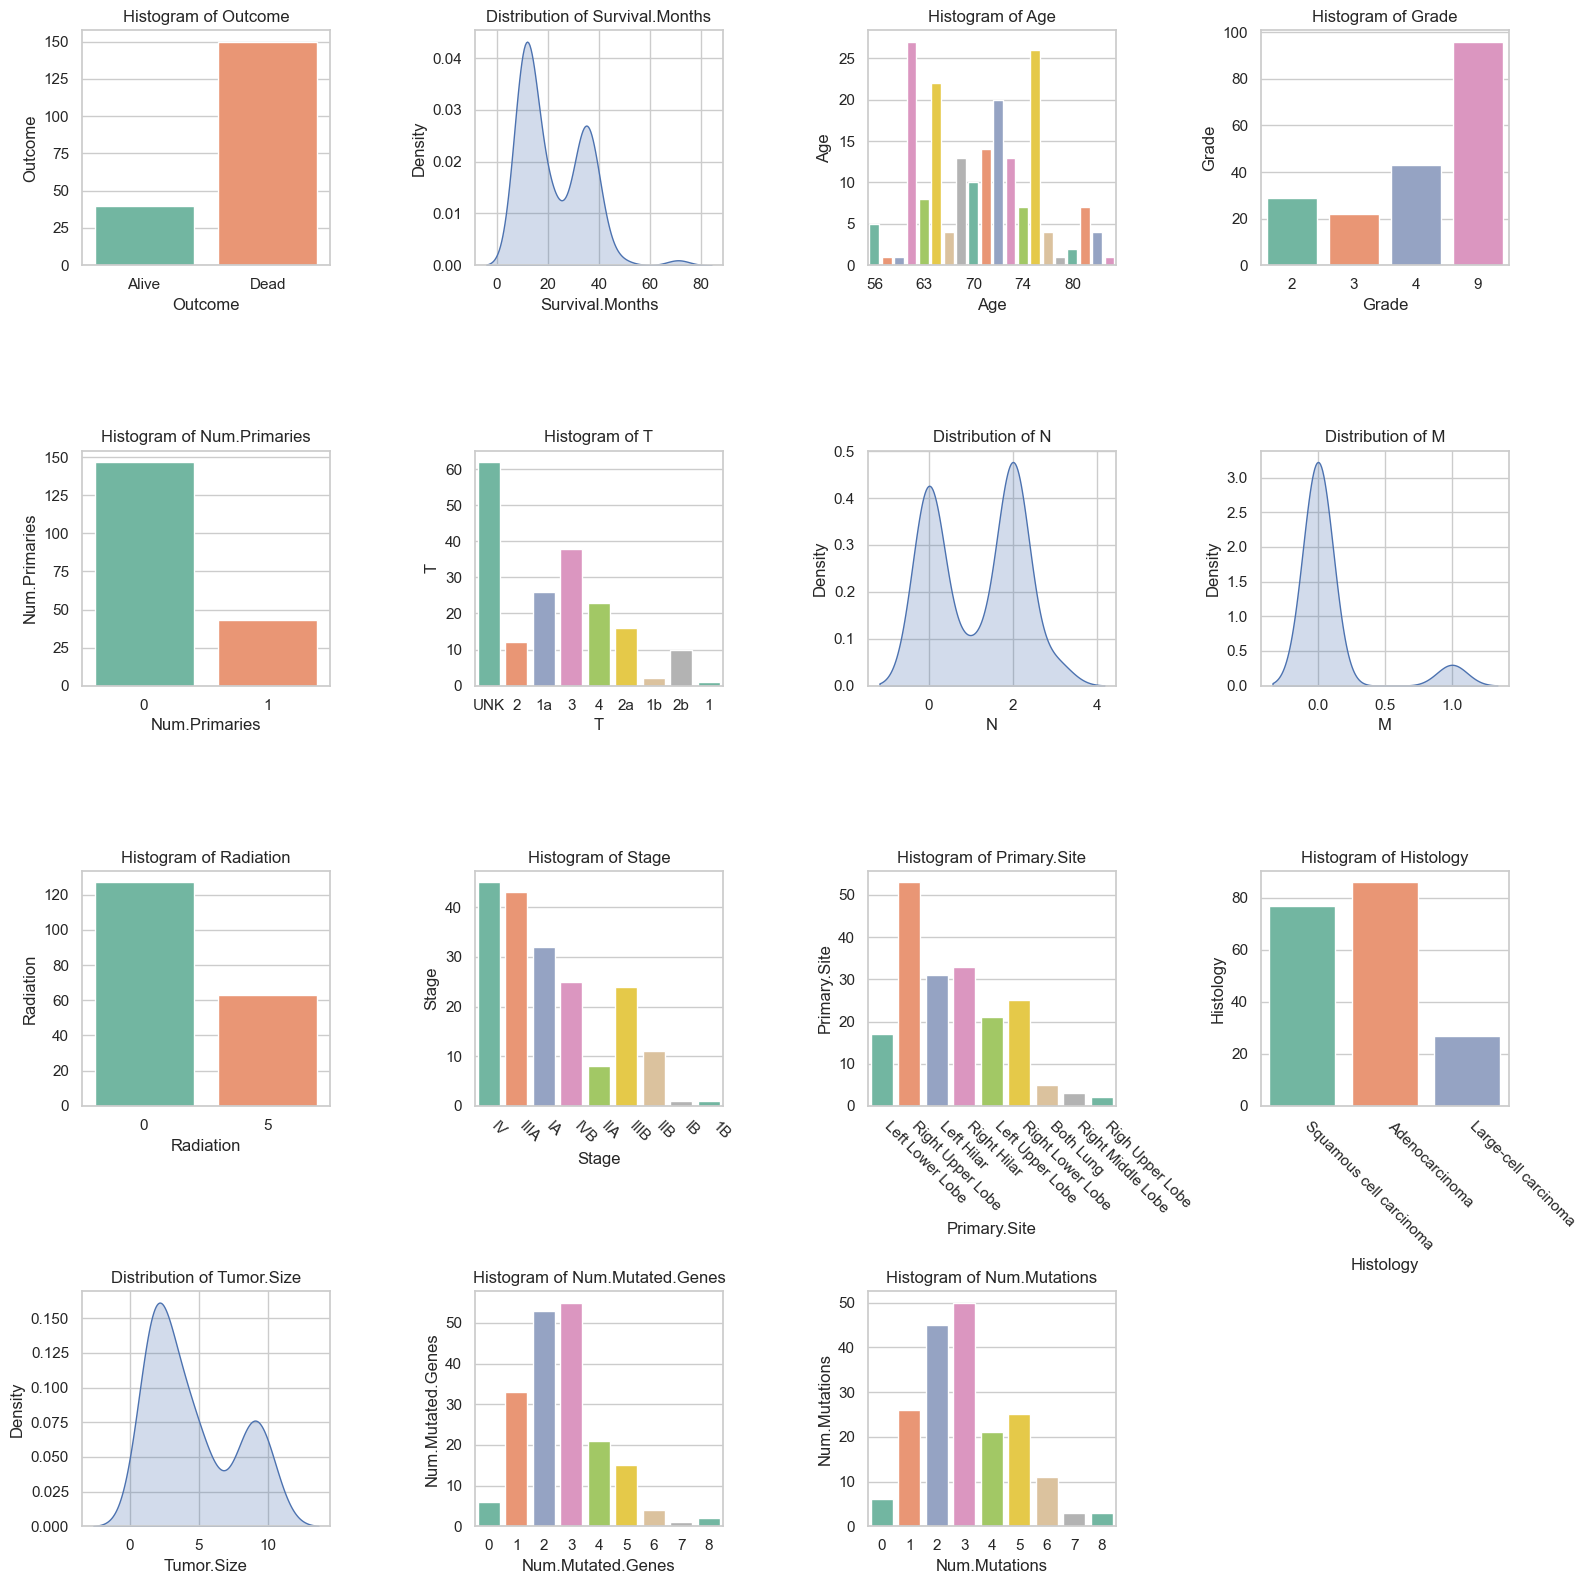

In [111]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, var in enumerate(clinical_data.columns):
    ax = axes[i]
    
    if clinical_data[var].dtype == "float64":
        sns.kdeplot(clinical_data[var].dropna(), shade=True, ax=ax)
        #sns.histplot(clinical_data[var].dropna(), kde=True, ax=ax)
        #ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Density')
    
    else:
        sns.countplot(data=clinical_data, x=var, palette='Set2', ax=ax)
        ax.set_title(f'Histogram of {var}')
        ax.set_ylabel(var)
        if i in [9, 10, 11]:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha="left") 
        if var == 'Age':
            ax.xaxis.set_major_locator(plt.MaxNLocator(5))

fig.delaxes(axes[15])
plt.tight_layout()
plt.show()


In [108]:
genomics_data = pd.read_csv("genomics.csv", index_col=0)

print_dataset_info(genomics_data)

,Gene
ID,
1,AKT1
158,AKT1
88,ALK_Col1
132,ALK_Col1
18,ALK_Col2


Dataset contains information from 184 patients


Feature Gene is of type: object and contains values in: ['AKT1' 'ALK_Col1' 'ALK_Col2' 'APC' 'ATM_Col1' 'ATM_Col2' 'BRAF' 'CCND2'
 'CDKN2A' 'CTNNB1' 'DNMT3A' 'EGFR' 'ERBB3' 'ERBB4' 'ESR1' 'FBXW7' 'FGFR1'
 'FGFR3' 'FLT4' 'FOXL2' 'GNAS' 'HNF1A' 'KRAS_Col1' 'KRAS_Col2' 'MAP2K2'
 'MET' 'MLH_Col2' 'MSH2' 'MSH6' 'NF_Col1' 'NF_Col2' 'NF_Col3' 'NF_Col5'
 'NOTCH1' 'NTRK1' 'PDGFRB' 'PIK3CA' 'PIK3CB' 'POLD_Col2' 'PTCH1' 'PTEN'
 'RB1' 'SMARCA4' 'SMARCB1' 'SMO' 'STK11' 'TERT' 'TP53_Col1' 'TP53_Col2'
 'TSC2']


Features that contain missing values: []


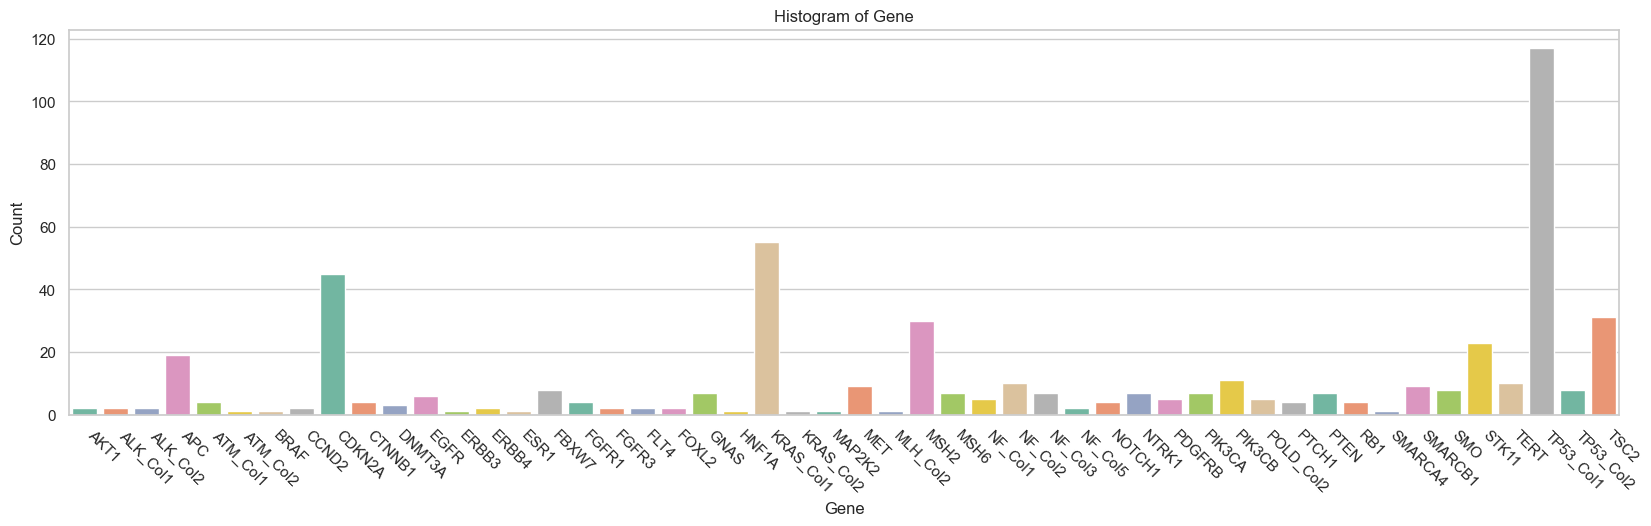

In [125]:
plt.figure(figsize=(20,5))
sns.countplot(data=genomics_data, x='Gene', palette='Set2')
plt.title('Histogram of Gene')
plt.ylabel('Count')
plt.xticks(rotation=-45, ha="left")
plt.show()

## Data Preprocessing

In [106]:
def preprocess_clinical_data(data: pd.DataFrame) -> pd.DataFrame:
    scaler = MinMaxScaler()
    imputer_cat = SimpleImputer(strategy='most_frequent') 
    imputer_num = SimpleImputer(strategy='mean') 

    # transform to binary number
    data["Outcome"] = data["Outcome"].replace({'Dead': 0, 'Alive': 1})

    # 'N', 'M', and 'Tumor.Size' all contain missing values
    data[["N", "M"]] = imputer_cat.fit_transform(clinical_data[["N", "M"]])
    data[["Tumor.Size"]] = imputer_num.fit_transform(clinical_data[["Tumor.Size"]])

    # normalize numerical features
    vars_to_scale = ["Survival.Months", "Age", "Tumor.Size", "Num.Mutated.Genes", "Num.Mutations"]
    data[vars_to_scale] = scaler.fit_transform(clinical_data[vars_to_scale])

    # 'N', 'M', and 'Radiation' are really categorical (in this dataset)
    data = data.astype({"N": int, "M": int})
    data["Radiation"] = clinical_data["Radiation"].replace({5: 1})
    
    # encode categorical features with classes > 2
    data = pd.get_dummies(data, columns=["Grade", "T", "N", "Stage", "Primary.Site", "Histology"], drop_first=True)

    return data


clinical_data_processed = preprocess_clinical_data(clinical_data)
print_dataset_info(clinical_data_processed)

,Outcome,Survival.Months,Age,Num.Primaries,M,Radiation,Tumor.Size,Num.Mutated.Genes,Num.Mutations,Grade_3,...,Primary.Site_Left Hilar,Primary.Site_Left Lower Lobe,Primary.Site_Left Upper Lobe,Primary.Site_Righ Upper Lobe,Primary.Site_Right Hilar,Primary.Site_Right Lower Lobe,Primary.Site_Right Middle Lobe,Primary.Site_Right Upper Lobe,Histology_Large-cell carcinoma,Histology_Squamous cell carcinoma
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0.000000,0.392857,0,0,0,0.044444,1.000,1.000,False,...,False,True,False,False,False,False,False,False,False,True
2,0,0.161290,0.607143,0,0,1,0.388322,0.250,0.250,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0.064516,0.571429,0,0,0,0.055556,0.125,0.125,True,...,False,False,False,False,False,False,False,True,False,False
4,0,0.096774,0.464286,1,1,0,0.388322,0.500,0.500,False,...,False,False,False,False,False,False,False,True,False,False
5,0,0.016129,0.714286,0,0,0,0.388322,0.375,0.375,False,...,True,False,False,False,False,False,False,False,True,False


Dataset contains information from 190 patients


Feature Outcome is of type: int64 and contains values in: [1 0]
Feature Survival.Months is of type: float64 and contains values in: [0.0, 0.9999999999999999]
Feature Age is of type: float64 and contains values in: [0.0, 1.0]
Feature Num.Primaries is of type: int64 and contains values in: [0 1]
Feature M is of type: int64 and contains values in: [0 1]
Feature Radiation is of type: int64 and contains values in: [0 1]
Feature Tumor.Size is of type: float64 and contains values in: [0.0, 1.0]
Feature Num.Mutated.Genes is of type: float64 and contains values in: [0.0, 1.0]
Feature Num.Mutations is of type: float64 and contains values in: [0.0, 1.0]
Feature Grade_3 is of type: bool and contains values in: [False  True]
Feature Grade_4 is of type: bool and contains values in: [ True False]
Feature Grade_9 is of type: bool and contains values in: [False  True]
Feature T_1a is of type: bool and contains values in: [False  True]
Feature T_1b is of 

In [203]:
def preprocess_genomic_data(data: pd.DataFrame, num_patients: int=190) -> pd.DataFrame:
    imputer = SimpleImputer(strategy='most_frequent')
    
    data = pd.crosstab(data.index, genomics_data["Gene"])
    complete_index = pd.Index(range(1, num_patients + 1))
    missing_IDs = complete_index.difference(data.index)

    for index in missing_IDs:
        data.loc[index] = [np.nan] * data.shape[1]

    data.sort_index(inplace=True)
   
    # I am making the assumption we want to be able to make predictions even when genomic data is not available
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    data = data.astype(int)
    data.index = range(1, len(data) + 1)
    data.index.name = 'ID'

    return data


genomics_data_processed = preprocess_genomic_data(genomics_data)
display(genomics_data_processed)


Gene,AKT1,ALK_Col1,ALK_Col2,APC,ATM_Col1,ATM_Col2,BRAF,CCND2,CDKN2A,CTNNB1,...,PTEN,RB1,SMARCA4,SMARCB1,SMO,STK11,TERT,TP53_Col1,TP53_Col2,TSC2
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
188,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [151]:
# Merge clinical and genomic data
combined_data = pd.merge(clinical_data_processed, genomics_data_processed, on='ID', how='left')
combined_data


,Outcome,Survival.Months,Age,Num.Primaries,M,Radiation,Tumor.Size,Num.Mutated.Genes,Num.Mutations,Grade_3,...,PTEN,RB1,SMARCA4,SMARCB1,SMO,STK11,TERT,TP53_Col1,TP53_Col2,TSC2
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0.000000,0.392857,0,0,0,0.044444,1.000,1.000,False,...,0,0,0,0,0,1,0,0,0,1
2,0,0.161290,0.607143,0,0,1,0.388322,0.250,0.250,False,...,0,0,0,0,1,0,0,1,0,0
3,0,0.064516,0.571429,0,0,0,0.055556,0.125,0.125,True,...,0,0,0,0,0,1,0,0,0,0
4,0,0.096774,0.464286,1,1,0,0.388322,0.500,0.500,False,...,0,0,0,0,0,0,0,1,0,0
5,0,0.016129,0.714286,0,0,0,0.388322,0.375,0.375,False,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,0.370968,0.928571,0,1,0,0.888889,0.250,0.250,False,...,1,0,0,0,0,0,0,0,0,0
187,0,0.016129,0.214286,0,0,0,0.388322,0.375,0.625,False,...,0,0,0,0,0,0,0,0,0,1
188,0,0.225806,0.571429,0,0,0,0.111111,0.375,0.375,True,...,0,0,0,0,0,0,0,1,0,0


## Feature Engineering and Dimensionality Reduction

In [195]:
# The dataset is now highly dimensional and should be reduced based on statistical significance and/or PCA

def reduce_dimensionality(data: pd.DataFrame, type: str="stat") -> tuple:

    X = data.drop(columns=["Outcome"])
    y = data["Outcome"]

    # dataset is pretty small so I'll keep the test size small, try address class imbalance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Try to stick around the 10% rule

    if type == "stat":
        selector = SelectKBest(f_classif, k=20)
        X_train_new = selector.fit_transform(X_train, y_train)
        X_test_new = selector.transform(X_test)
        selected_features = X.columns[selector.get_support()]
        print(f"Selected Features: {selected_features.tolist()}")

    elif type == "pca": 
        pca = PCA(n_components=20)
        X_train_new = pca.fit_transform(X_train)
        X_test_new = pca.transform(X_test)
        print("Explained variance ratios:", pca.explained_variance_ratio_)

    elif type == "both":
        selector = SelectKBest(f_classif, k=40)
        X_train_new = selector.fit_transform(X_train, y_train)
        X_test_new = selector.transform(X_test)
        selected_features = X.columns[selector.get_support()]
        print(f"Selected Features: {selected_features.tolist()}")

        pca = PCA(n_components=20)
        X_train_new = pca.fit_transform(X_train_new)
        X_test_new = pca.transform(X_test_new)
        print("Explained variance ratios:", pca.explained_variance_ratio_)

    
    return X_train_new, X_test_new, y_train, y_test

    
X_train_new, X_test_new, y_train, y_test = reduce_dimensionality(combined_data)

Selected Features: ['Num.Primaries', 'Tumor.Size', 'Grade_9', 'T_2a', 'T_3', 'Stage_IA', 'Primary.Site_Left Lower Lobe', 'Primary.Site_Right Hilar', 'Histology_Squamous cell carcinoma', 'ATM_Col1', 'CTNNB1', 'DNMT3A', 'EGFR', 'ERBB4', 'FGFR3', 'FOXL2', 'NOTCH1', 'PDGFRB', 'POLD_Col2', 'PTCH1']


## Model Training

In [ ]:
# With additional time I would also like to compare with and explainable model like logistic regression and a complex model like a neural network

In [200]:
def train_and_predict(X_train_new: np.ndarray, 
                      X_test_new: np.ndarray, 
                      y_train: np.ndarray, 
                      method: str="rfc", 
                      optimize: bool=False) -> tuple:

    if method == "rfc":
        # if optimize, run a parameter search
        if optimize:
            param_grid = {
                'n_estimators': np.arange(100, 1100, 100),
                'max_features': ['sqrt', 'log2'],
                'max_depth': np.arange(5, 25, 5),
                'min_samples_split': np.arange(2, 12, 2),
                'min_samples_leaf': np.arange(1, 6), 
            }

            rfc = RandomForestClassifier(random_state=42)
            grid_search = GridSearchCV(estimator=rfc, 
                                       param_grid=param_grid,
                                       scoring='roc_auc',
                                       cv=5,
                                       n_jobs=-1)
            
            grid_search.fit(X_train_new, y_train)

            best_params = grid_search.best_params_
            best_score = grid_search.best_score_

            print("Best params:", best_params)
            print("Best CV score:", best_score)

            rfc = grid_search.best_estimator_
            y_pred = rfc.predict(X_test_new) 

        else:
            # simple baseline model
            rfc = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
            rfc.fit(X_train_new, y_train)

            # prediction/inference
            y_pred = rfc.predict(X_test_new)


    return rfc, y_pred


model, y_pred = train_and_predict(X_train_new, X_test_new, y_train, "rfc", True)


Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score: 0.9160714285714284


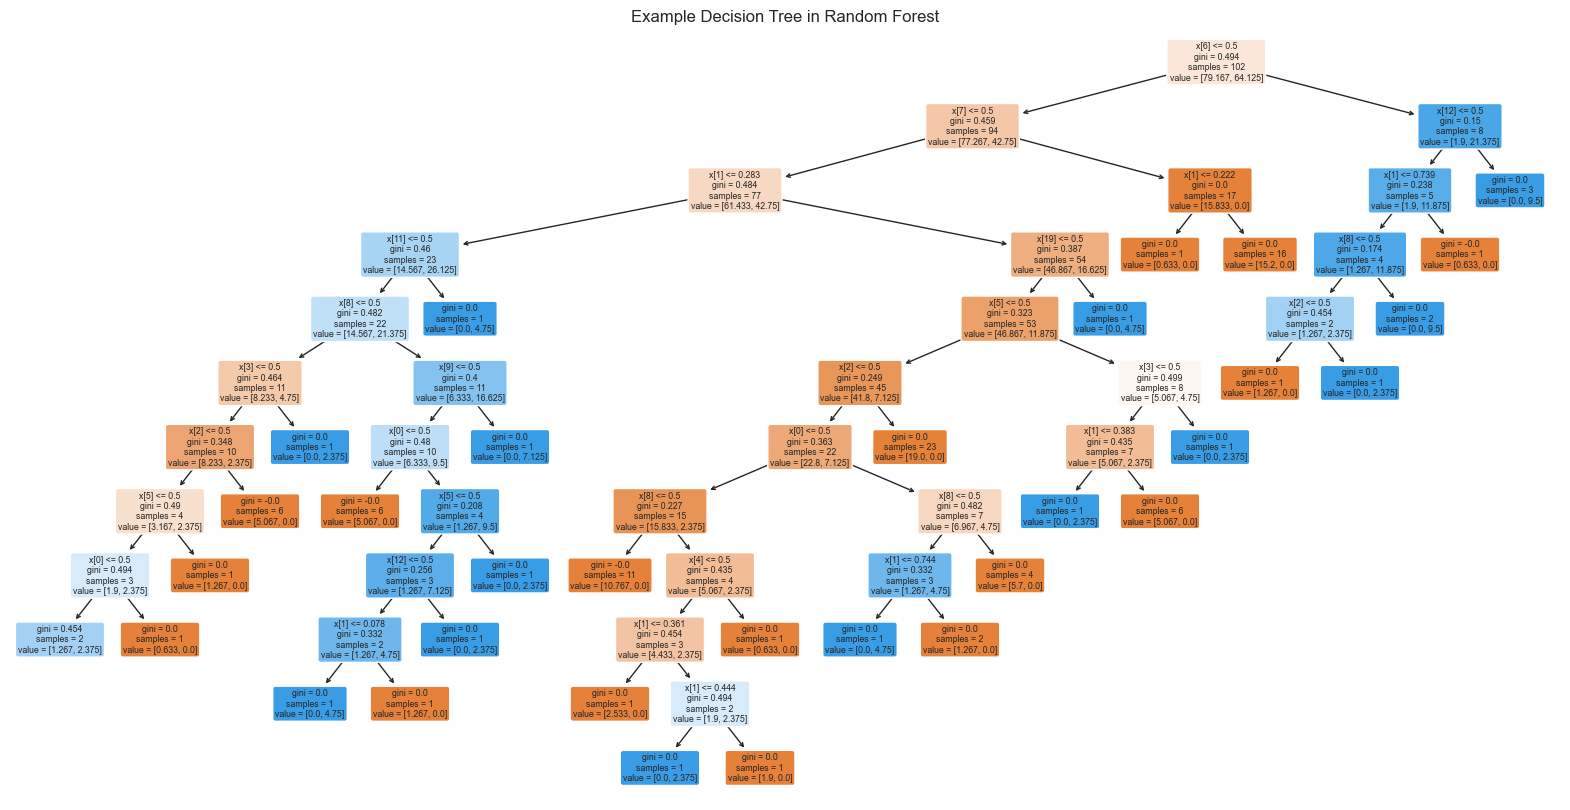

In [197]:
# Visualize example tree from simple rfc to determine grid search
model, y_pred = train_and_predict(X_train_new, X_test_new, y_train, "rfc", False)
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, rounded=True) # feature_names=selected_features
plt.title("Example Decision Tree in Random Forest")
plt.show()

## Evaluation

Confusion Matrix:
 [[30  0]
 [ 4  4]]


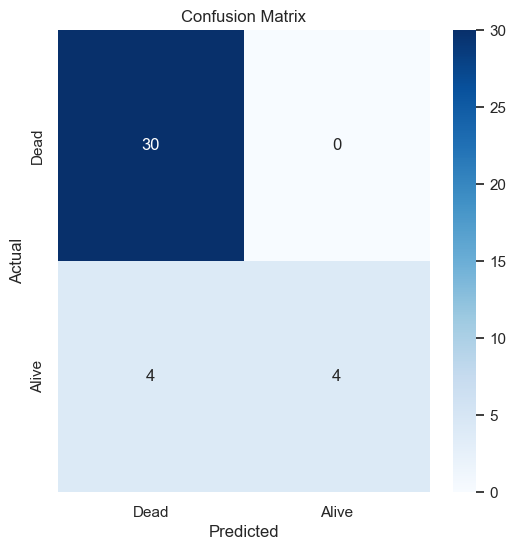

Classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.50      0.67         8

    accuracy                           0.89        38
   macro avg       0.94      0.75      0.80        38
weighted avg       0.91      0.89      0.88        38

ROC-AUC score: 0.9916666666666667


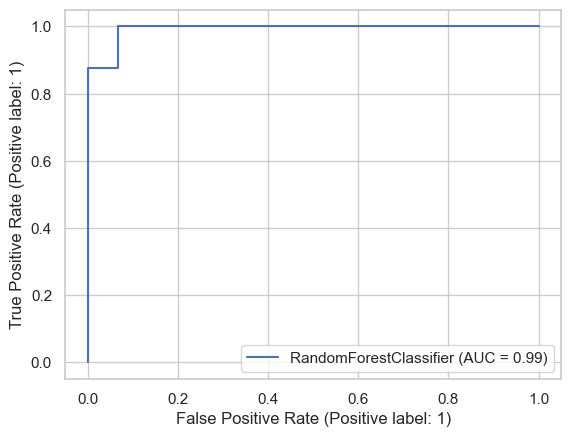

In [202]:
def evaluate_model(model, y_test: np.ndarray, y_pred: np.ndarray) -> None:
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dead', 'Alive'], yticklabels=['Dead', 'Alive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification report:\n", class_report)

    # ROC-AUC score
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_new)[:, 1])
    print("ROC-AUC score:", roc_auc)

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test_new, y_test)


evaluate_model(model, y_test, y_pred)


# Questions

1. This data, like our real data, may be messy, incomplete, and/or sparsely documented. Please walk us through how you cleaned up this dataset. Do you see any interesting trends?

My first thought was to explore exactly how messy the data was. I checked for missing data as well as gaining an understanding of the data types and range of values each feature could take. With that came an understanding that the data provided here might not match the spec one-to-one in the sense that sone features that were seemingly continuous/numerical were really more categorical for this small set, i.e. the number of primary tumors, the number of metastases to lymph nodes, and the number of distant metastases. Therefore, for this particular small dataset they might be best suited as categorical variables. Plotting the distribution of each feature allowed me to gain immediate insight to imbalances or outliers that existed in the data etc. The dataset was also cleaned up by using simple data imputation techniques with the knowledge that slightly more sophisticated techniques like kNN imputation could be attempted as well. For preprocessing, categorical variables as well as the genomic data were one-hot ended with the inclusion of using dummy variables and numerical features were normalized before being fed into the model. This often leads to enhanced model performance especially when the feature ranges can vary when compared to one another. Random forests are a bit more robust to these types of transforms, but it is still good practice to do so. The dataframes containing clinical and genomic data were eventually merged by patient ID under the assumption that it was better to keep the patients/ID’s in the dataset even if they were missing from the genomics dataset. Data was of the essence in such a small set such as this so I decided to use data imputation instead of omitting those data points. If the training set was much larger, we could likely leave those IDs out of the dataset unless class imbalance still posed a major issue and there was overlap. I think given more time it would be interesting to run additional statistical tests such as Pearson correlation and Chi-squared tests however we already get a taste of this when looking at feature importances during dimensionality reduction. 

2. Tell us how you decided which features to use for your model. Are there any new features it might be productive to engineer from the current features?

For feature engineering, I coded around playing with the idea that a user could use both feature selection based on statistical thresholds and PCA if they so choose. PCA could be nice if multicollinearity becomes too much of an issue. For the models I ran, I selected features based on statistical significance using the out of the box SelectKBest for simplicity and explainability. I tried to not stray too far away from the rule of thumb of having ~10 data points for each feature at a minimum. Because of this I used 20 features after features transformations. It was refreshing to see that about half came from the genomic dataset. Looking at feature-feature relationships and engineering according to those results could likely provide an additional performance boost but these ideas are also captured by using random forest classifiers.
The dimensionality of the data was already so large compared to the number of data points that additional feature engineering or creation after the transforms applied in the previous section (using addition or multiplication etc.) would likely make the model overly complex and/or overfit. 

3. Which algorithm did you use for the prediction and why?

I decided to implement a random forest classifier for a few reasons. The first being that the development time is relatively low given the model complexity. Most importantly, random forests are super robust and often used with high-dimensional datasets. It is also a natural choice when there is a combination of data types such as numerical and categorical data. Random forests can generally be tuned in a way that makes them generalizable and robust to overfitting. The out of the box solution also provides the ability to look at feature importance and examples of decision trees. Again, the implementation I used also allowed for easy and fast optimization of parameters and evaluation which is nice for quick prototyping. 

4. How did you assess the predictive model’s quality? Summarize your findings.

This being a binary classification task, I used relatively standard metrics for evaluating the model. Metrics such as the accuracy, the confusion matrix, F1 score, ROC-AUC score and visualizing a handful of the above. With the general idea of balancing the TPR and FPR, I used the ROC-AUC as the criteria for scoring what model in my parameter grid search was best. Overall I found the model to be fairly successful given how small the dataset is. Shear accuracy fluctuated around 90% which was a consistent improvement over the non-optimized solution I ran first. Generally speaking, my models did a great job not predicting someone would be alive when they actually died, i.e. the worst failure mode in this use case as a patient who needs attention the most may be denied that attention. 

5. Next steps? What might you do with more time or access to additional data or expertise?

With more time I would first turn to try and collect more data. This would eventually allow me to better tackle the class imbalance that exists. Certainly, with more time I would implement a host of different models with varying ranges of complexity and explainability; as I mentioned in my code examples might include simple logistic regression and a neural network. Of course, I could also add a larger parameter search for the models I chose to develop – this might also include things like optimizing the number of features chosen or feature engineering. Next steps would also naturally include running this model on unseen data at scale to paint a true picture of its generalizability. Additionally, I could build in additional items such as outlier detection and more rigorous statistical analysis before modeling. As mentioned in the prompt, I could use the expertise of those around me with domain knowledge in conjunction with the quantitative analyses I provide to make more human informed decision making when conducting things such as feature engineering or data imputation. 